In [1]:
import pandas as pd 
import numpy as np
import yfinance
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc

plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=14)


In [2]:
symbol ="AAPL TSLA SPY AMZN BABA GOOGL MSFT NFLX PYPL COST AAL GC=F"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        df=ticker.history(interval='1d',start="2020-03-15",end="2021-02-2")
        df['Date'] = pd.to_datetime(df.index) # just to crate another column for date!!!
        df['Date'] = df['Date'].apply(mpl_dates.date2num)
        df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(df)

len(data_frames_separate)

12

In [3]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [4]:
levels = [[] for i in range(len(num_name))]
for a in range(len(levels)):
    for i in range(2,data_frames_separate[a].shape[0]-2):
      if isSupport(data_frames_separate[a],i):
        levels[a].append((i,data_frames_separate[a]['Low'][i]))
      elif isResistance(data_frames_separate[a],i):
        levels[a].append((i,data_frames_separate[a]['High'][i]))
len(levels)


12

In [5]:
def plotSupportResistance(num):
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,data_frames_separate[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  plt.title(num_name[num])
  fig.tight_layout()

  for level in levels[num]:
    plt.hlines(level[1],xmin=data_frames_separate[num]['Date'][level[0]],\
               xmax=max(data_frames_separate[num]['Date']),colors='blue')


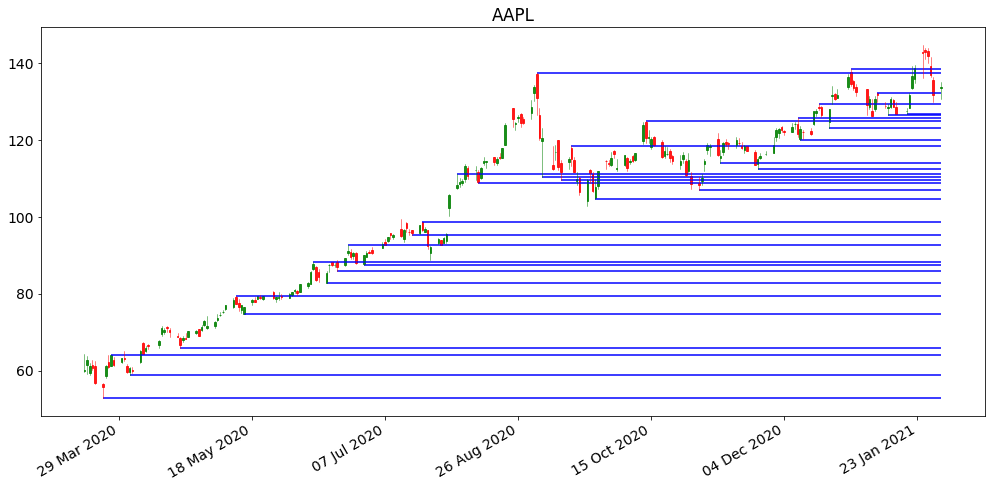

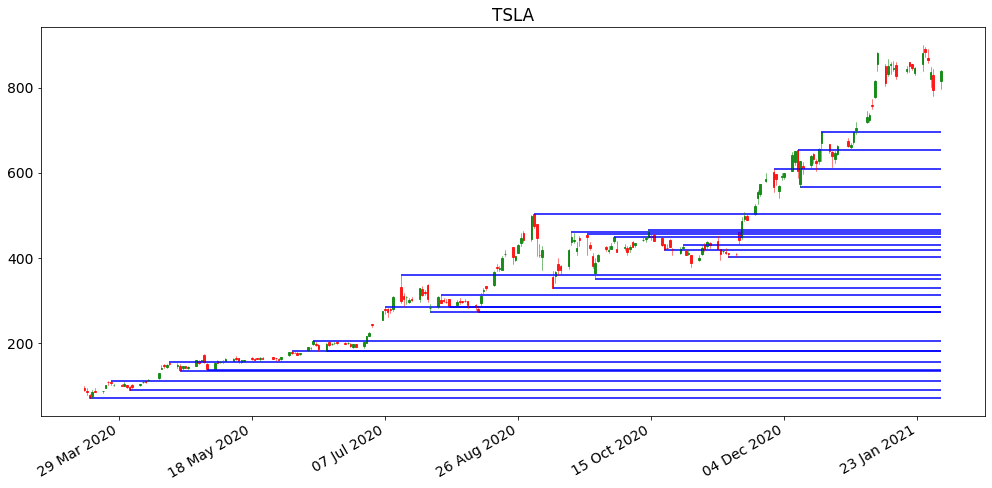

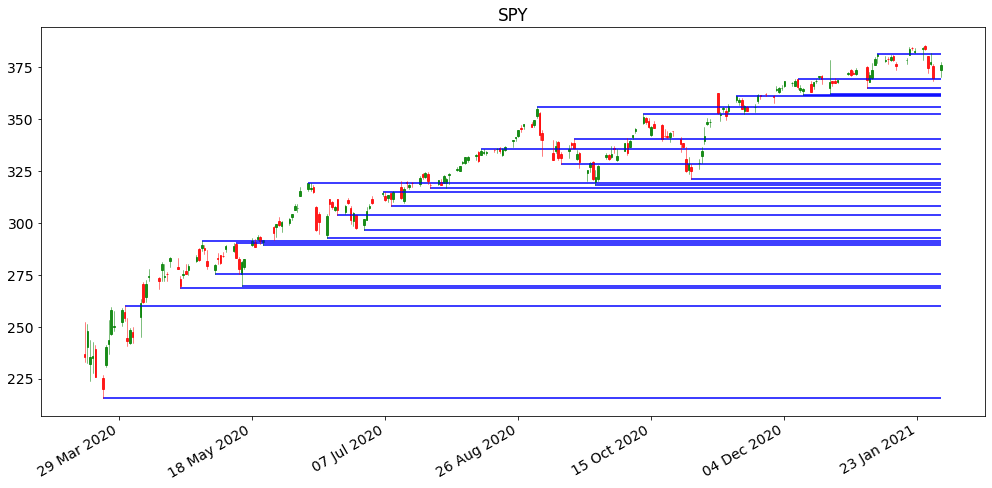

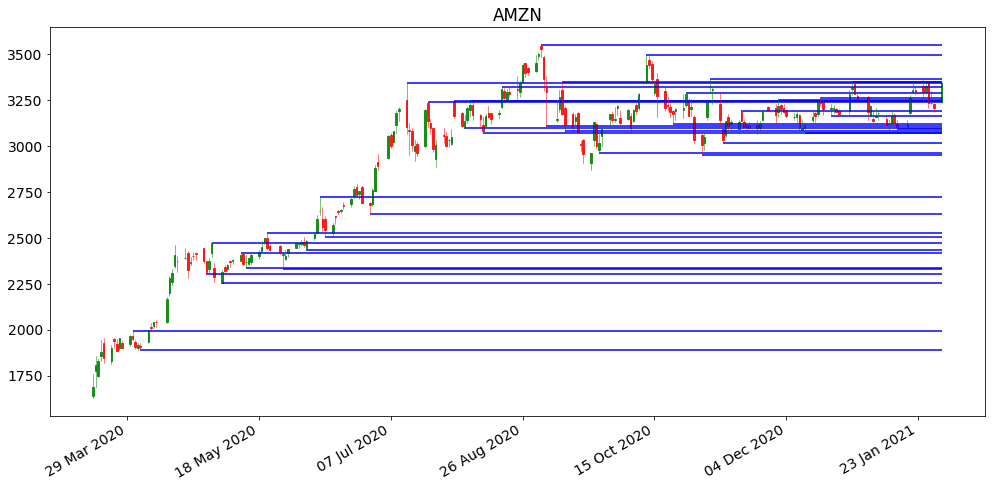

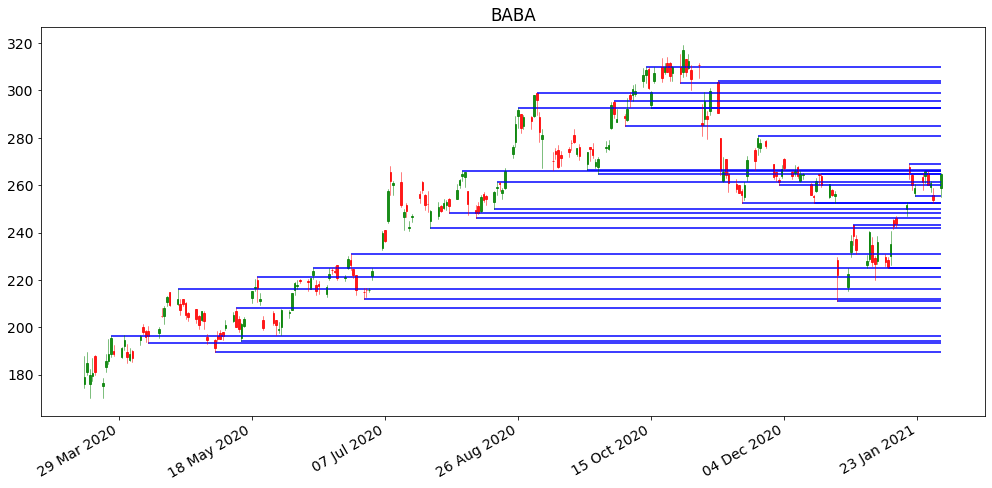

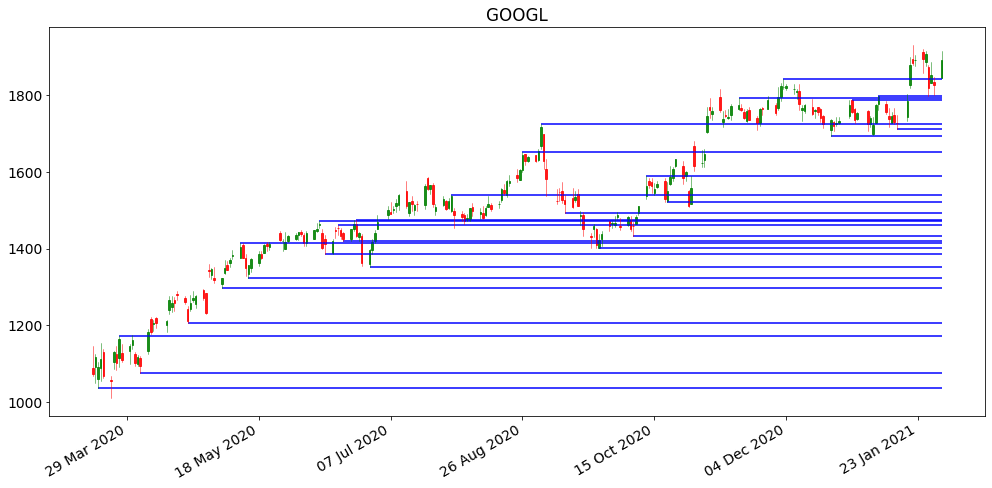

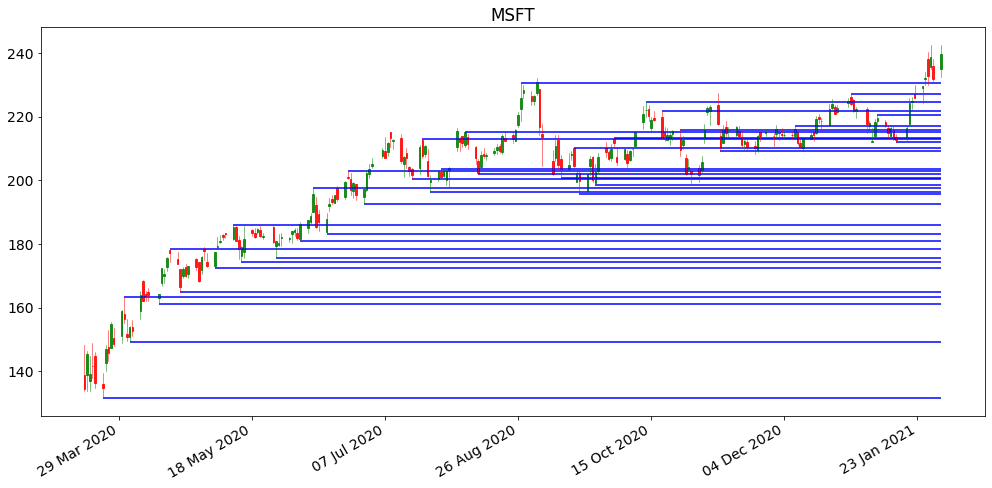

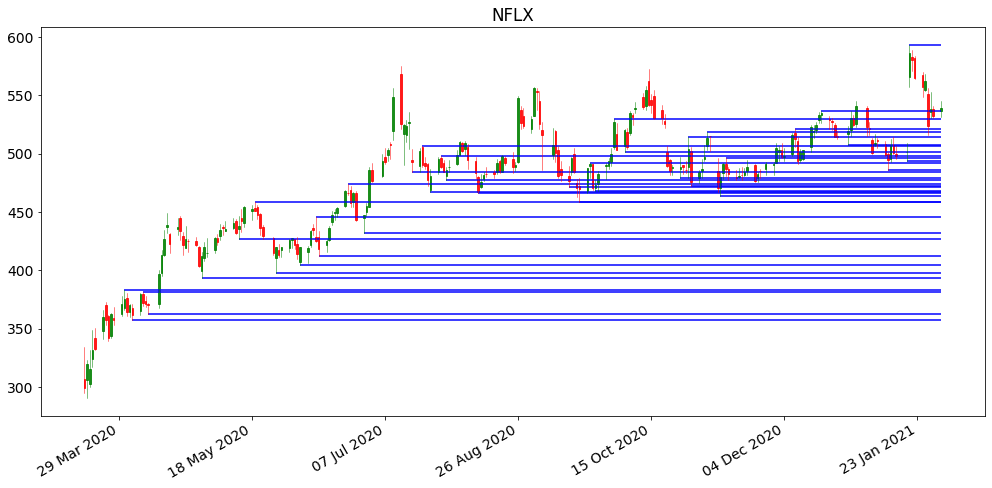

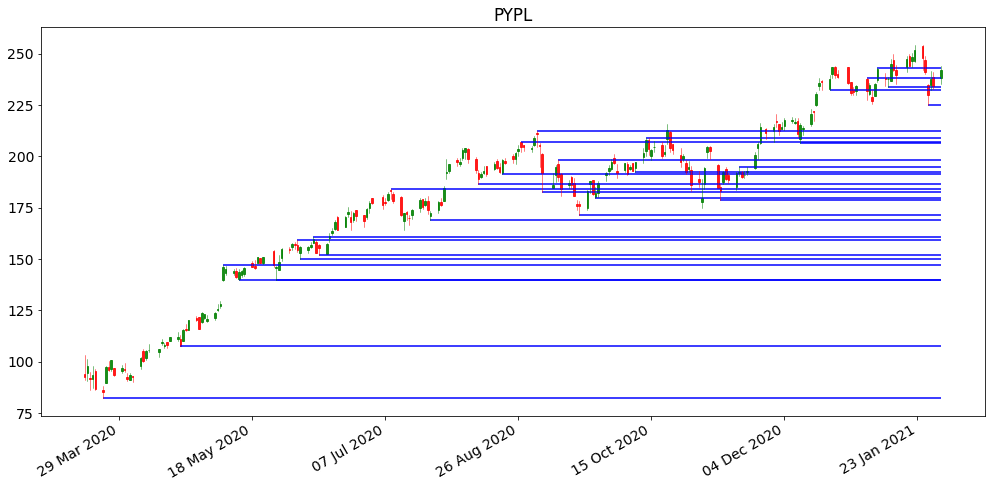

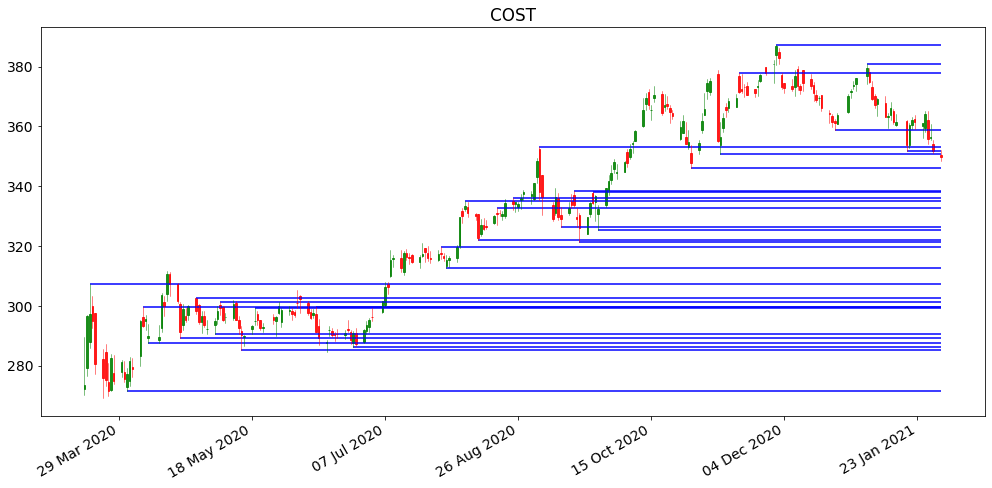

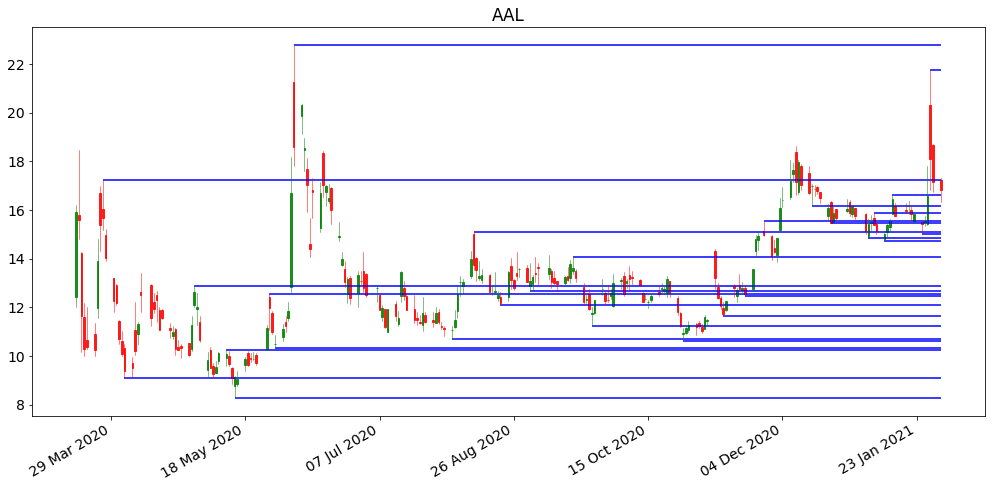

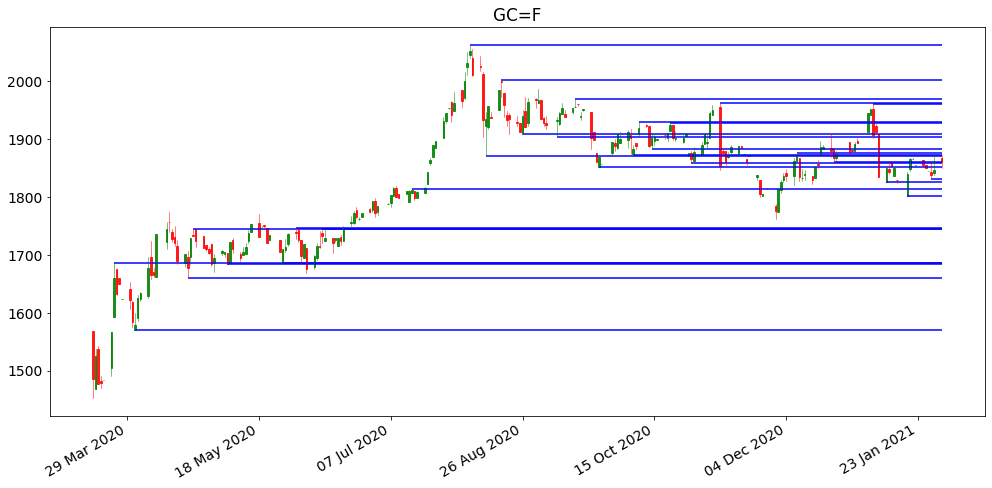

In [6]:
for i in range(len(num_name)):
    plotSupportResistance(i)

In [7]:
s=[]
for num in range(len(num_name)):
     s.append(np.mean(data_frames_separate[num]['High'] - data_frames_separate[num]['Low']))
s

[2.9854160560789547,
 19.933928998596464,
 5.413107959057265,
 80.8599005044843,
 6.753224394246602,
 38.91636431912136,
 5.095636927323389,
 16.844167666584923,
 6.0557494569787,
 6.160261865663706,
 0.948295935387034,
 24.530773870545815]

In [8]:
def isFarFromLevel(l,num):

  return np.sum([abs(l-x) < s[num]  for x in levels[num]]) == 0

In [9]:
len(levels)
levels

[[(5, 52.743656789004596),
  (8, 64.17256554570575),
  (13, 58.76944318970685),
  (25, 65.8470766553496),
  (40, 79.52242925490437),
  (43, 74.67679773747075),
  (60, 88.24852314137503),
  (63, 82.72878695359177),
  (67, 85.85556496299229),
  (69, 92.6289857647199),
  (73, 87.38039621398389),
  (86, 95.3602360805086),
  (88, 98.75317951084412),
  (97, 111.07866271819474),
  (103, 108.75706187198737),
  (119, 137.53683463561444),
  (121, 110.53384557213992),
  (125, 109.64670521872384),
  (127, 118.44834903512589),
  (134, 104.66276201280655),
  (147, 124.98726641834172),
  (161, 106.97531438045687),
  (167, 113.95970798919319),
  (177, 112.42200146115039),
  (187, 125.76206555808128),
  (188, 119.97072837387739),
  (193, 129.386656925025),
  (195, 123.26579915304578),
  (200, 138.58291153881558),
  (207, 132.43210269724648),
  (209, 126.67071086932953),
  (213, 126.75059554424776)],
 [(2, 70.10199737548828),
  (8, 112.0),
  (13, 89.27999877929688),
  (23, 154.99000549316406),
  (25, 13

In [10]:
levels = [[] for i in range(len(num_name))]
for num in range(len(levels)):
    for i in range(2,df.shape[0]-2):
        if isSupport(data_frames_separate[num],i):
            l = data_frames_separate[num]['Low'][i]

            if isFarFromLevel(l,num):
                  levels[num].append((i,l))

        elif isResistance(data_frames_separate[num],i):
            l = data_frames_separate[num]['High'][i]

            if isFarFromLevel(l,num):
                  levels[num].append((i,l))
#levels

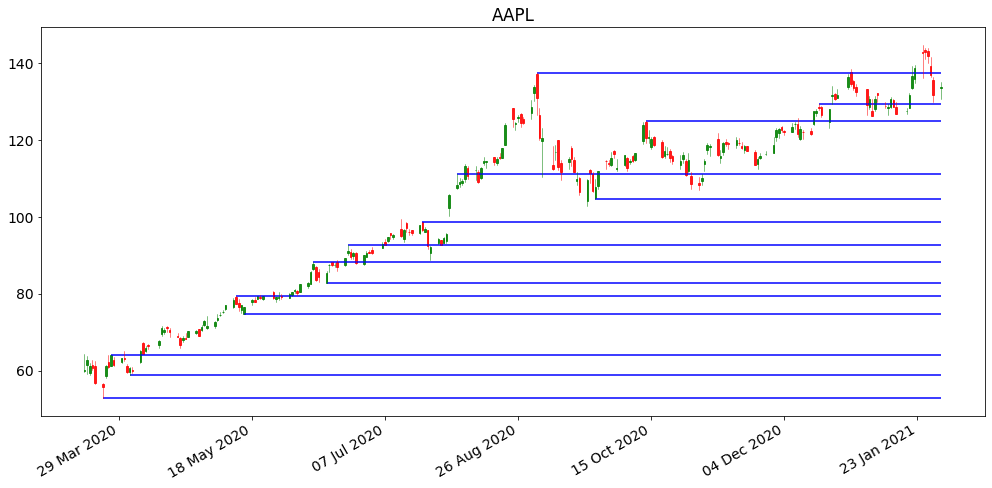

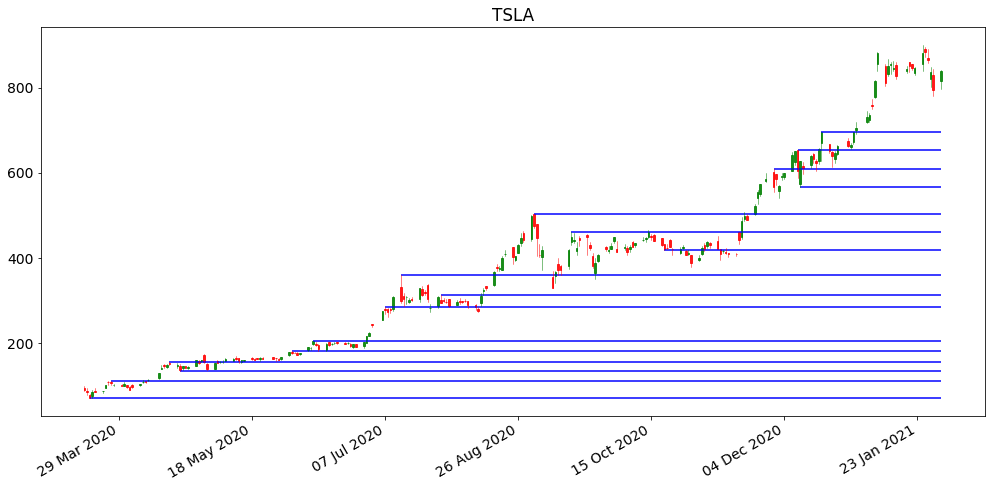

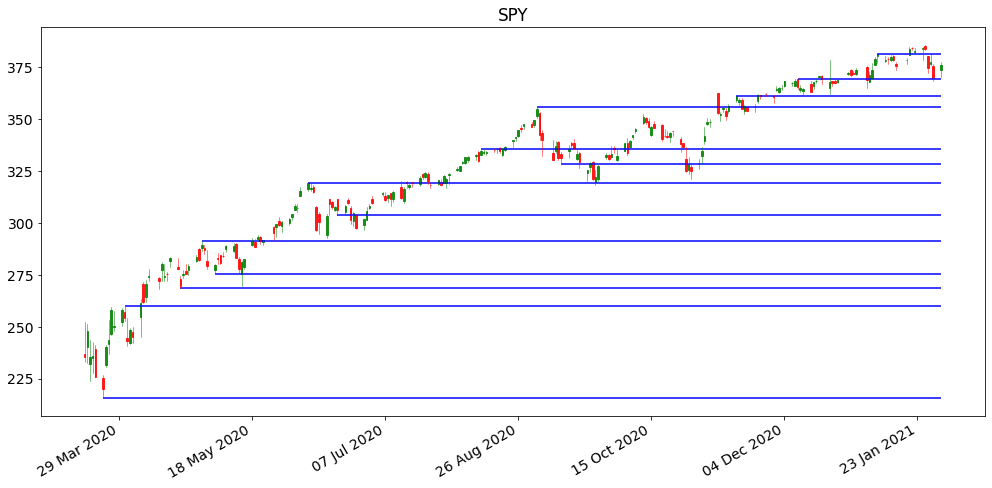

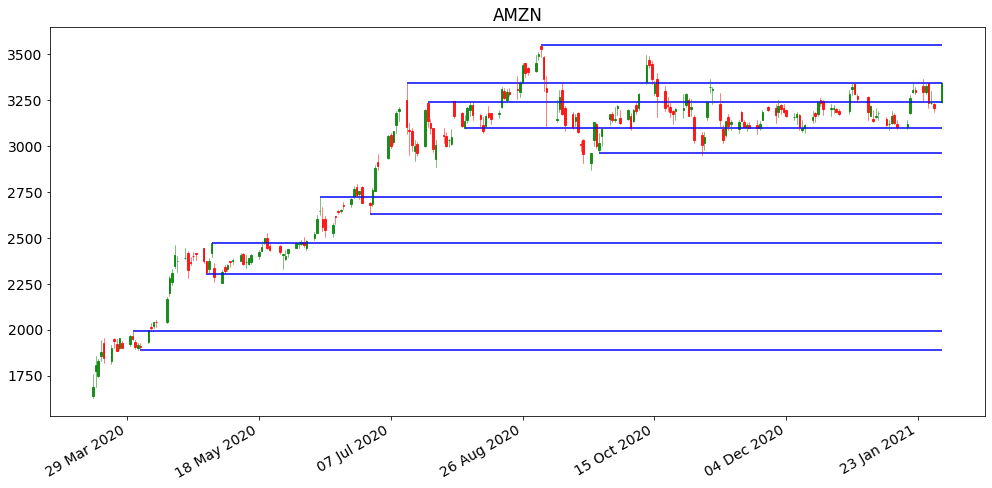

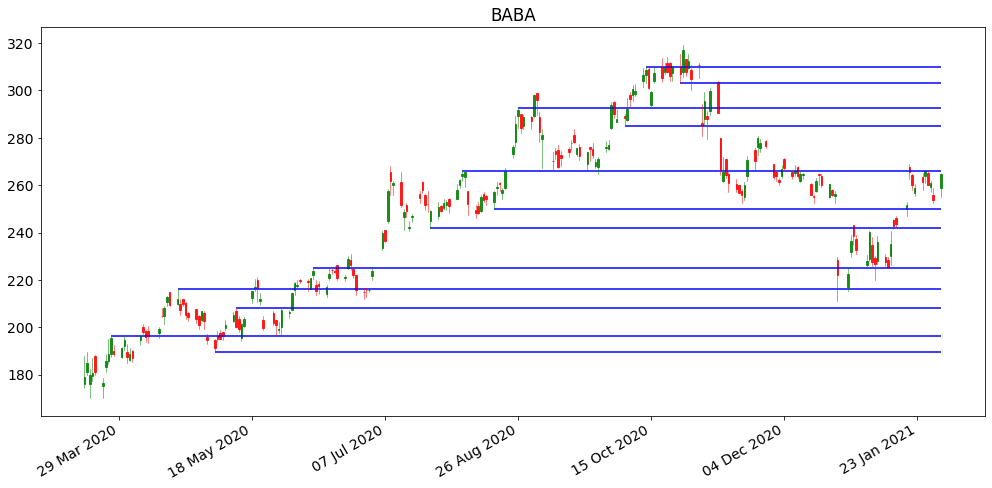

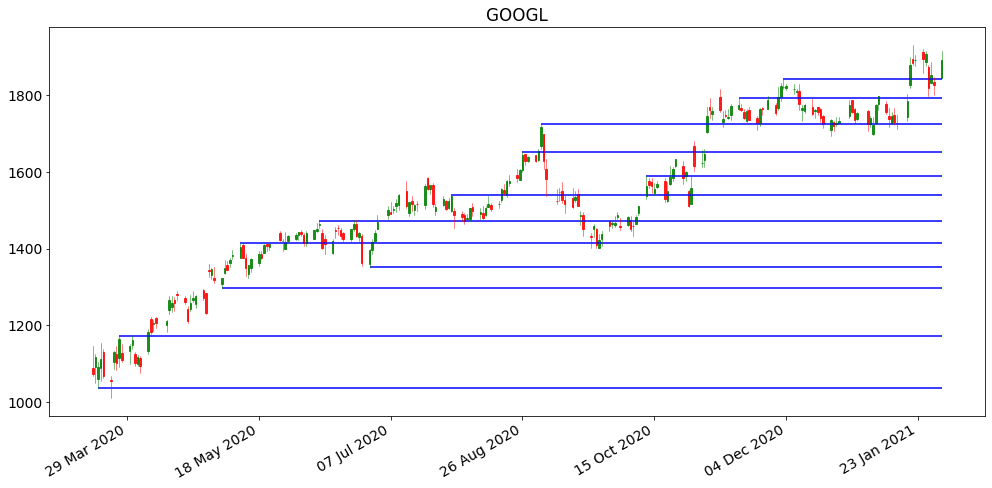

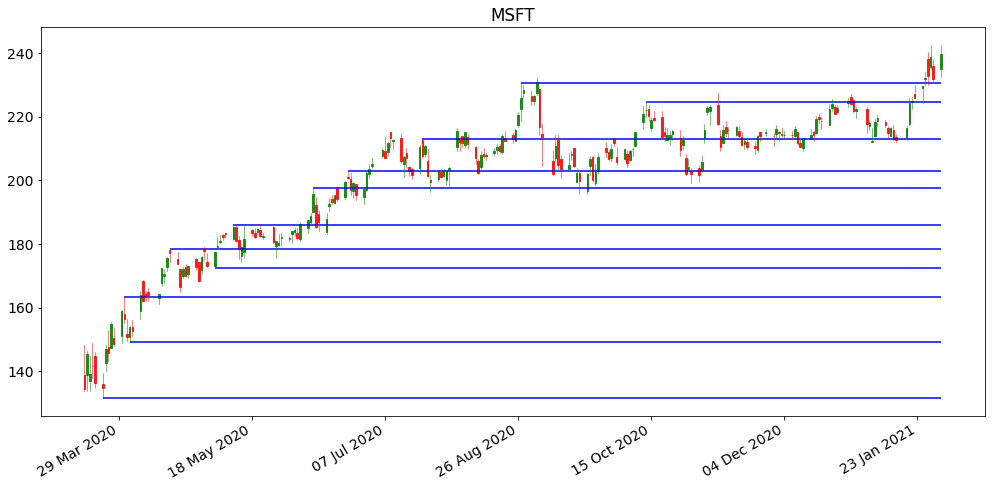

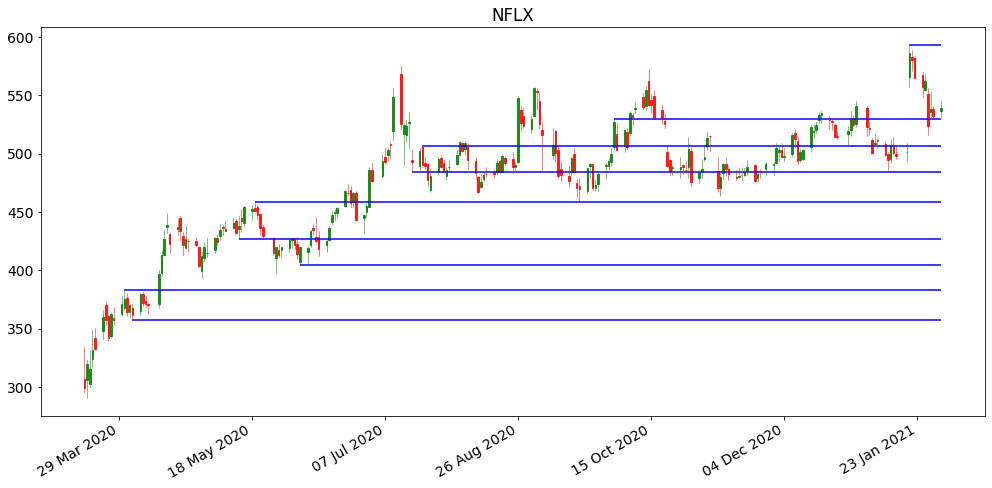

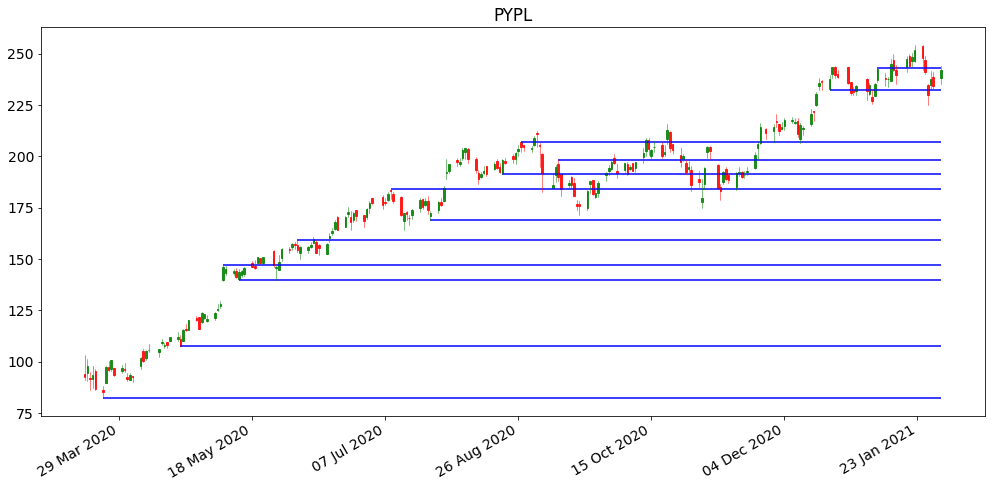

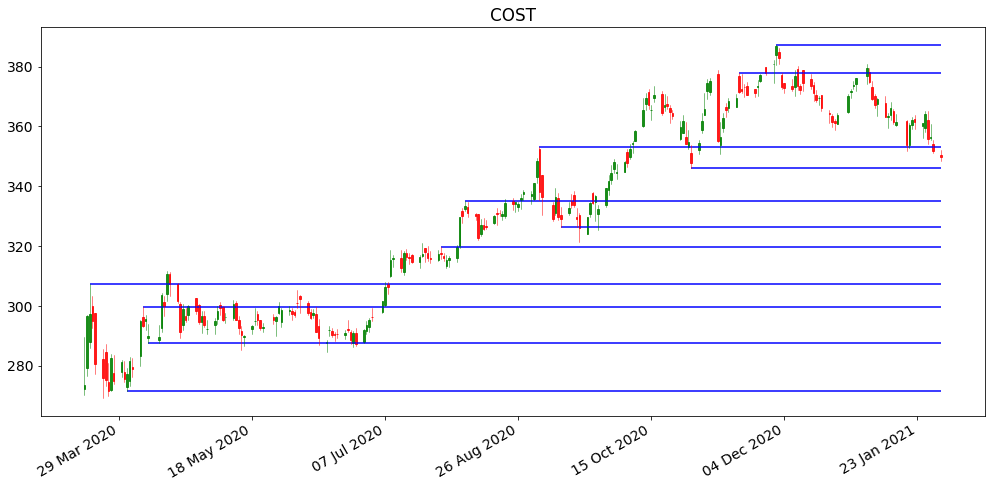

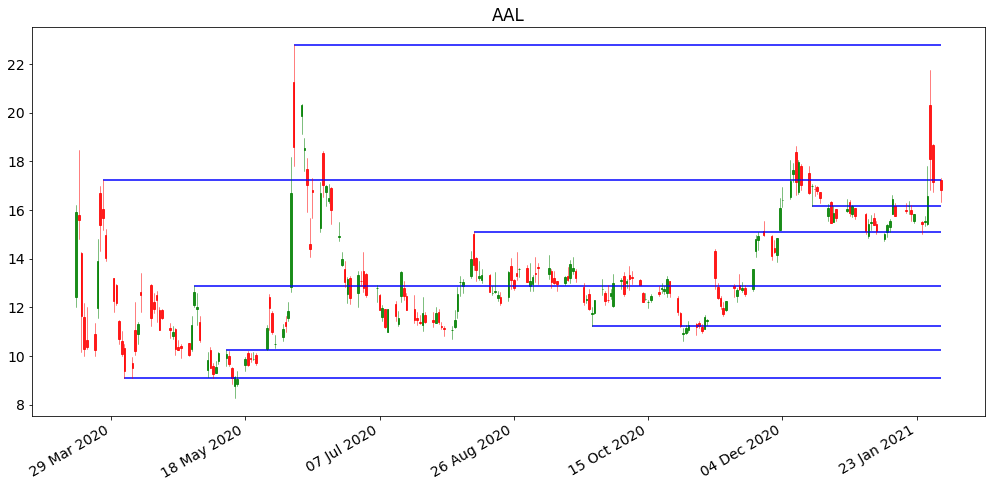

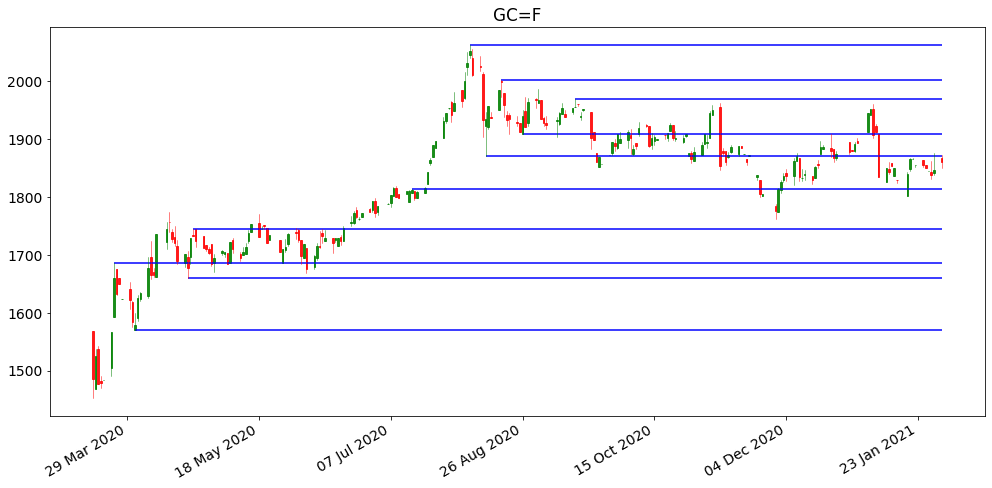

In [11]:
for i in range(len(num_name)):
    plotSupportResistance(i)